Comparing our Fluxbot data to CIRAS data collected at the "same" time

1. Load the CIRAS data
1. Load the Fluxbots
1. Find the closest event for each CIRAS data.

In [91]:
import pandas as pd
import numpy as np
import glob
import random
import matplotlib.pyplot as plot
from datetime import datetime
# import datetime

## Step 1: Load up the CIRAS data and create a timestamp column

In [92]:
# Get all the CIRAS data
# NOTE: This does not include the `dblchk` files..
ciras_dir = 'data/calval'
file = ciras_dir + '/calval_CIRASdat_Jan21.csv'

In [93]:
ciras_df = pd.read_csv(file)

In [130]:
ciras_df.columns
ciras_df.head

<bound method NDFrame.head of     PLOT TRTMNT FEAT  BOTREP      BOTID  CIRASFLX_L  CIRASFLX_Q   
0      N      O   OM       2    NO OM 2        2.55        2.47  \
1      N    MWC   OM       1  NMWC OM 1        3.47        3.07   
2      N    MWC   OM       1  NMWC OM 1        4.03        3.62   
3      N      O   OM       2    NO OM 2        2.60        2.50   
4      N      O   UT       1    NO UT 1        1.81        1.36   
..   ...    ...  ...     ...        ...         ...         ...   
207    N      O   OS       2    NO OS 2        2.36        2.35   
208    N    MWC   OM       1  NMWC OM 1        5.84        5.69   
209    N    MWC   UT       3  NMWC UT 3        1.19        0.73   
210    N    MWC   OM       1  NMWC OM 1        3.99        3.76   
211    N    MWC   OM       1  NMWC OM 1        3.48        2.91   

           CIRAS_T  timestamp  
0    8/17/19 10:34 2019-08-17  
1    8/15/19 12:05 2019-08-15  
2    8/13/19 12:01 2019-08-13  
3    8/20/19 10:36 2019-08-20  
4    

In [134]:
# ciras_df['timestamp'] = pd.to_datetime(df.CIRAS_T)
# ciras_df['timestamp'] = pd.to_datetime(ciras_df.CIRAS_T)
# ciras_df['CIRAS_T'] = datetime.datetime


# ciras_df['timestamp'] = datetime.(ciras_df['CIRAS_T'])
# ciras_df['timestamp'] = np.datetime64(ciras_df['CIRAS_T'])
# ciras_df['timestamp'] = ciras_df['timestamp'].astype(np.datetime64)
ciras_df['timestamp'] = pd.to_datetime(ciras_df['CIRAS_T'], format = "%m/%d/%y %H:%M", utc=True)
# ciras_df['timestamp'] = pd.to_datetime(ciras_df['CIRAS_T'], format = 'mixed')

# ciras_df['timestamp'] = ciras_df['timestamp'].astype('datetime64[ns]')
# ciras_df['timestamp'] = ciras_df['timestamp'].dt

# ciras_df['timestamp'] = ciras_df['timestamp'].values.astype('datetime64[ns]')
ciras_df['timestamp'].dtypes


datetime64[ns, UTC]

In [143]:
ciras_df['timestamp'].head

<bound method NDFrame.head of 0     2019-08-17 10:34:00+00:00
1     2019-08-15 12:05:00+00:00
2     2019-08-13 12:01:00+00:00
3     2019-08-20 10:36:00+00:00
4     2019-08-13 12:53:00+00:00
                 ...           
207   2019-08-22 11:16:00+00:00
208   2019-08-14 09:34:00+00:00
209   2019-08-13 11:37:00+00:00
210   2019-08-17 09:32:00+00:00
211   2019-08-16 14:40:00+00:00
Name: timestamp, Length: 212, dtype: datetime64[ns, UTC]>

## Helper Functions to Read Data and Determine the "Closest" fluxbot observation

In [135]:
def float_conv(x):
    try:
        return float(x)
    except:
        return np.nan

locations = {
    'OM': 'Termite Soil',
    'UT': 'Under Tree',
    'OS': 'Open Soil'
}

# def find_closest(ciras, fluxbots):
#     this_treatment = ciras.TRTMNT
#     this_location = locations[ciras.FEAT]
#     this_replicate = ciras.BOTREP
#     df = fluxbots[
#         (fluxbots['treatment'] == this_treatment) & 
#         (fluxbots['location'] == this_feature) & 
#         (fluxbots['replicate'] == this_replicate)
#     ]
#     time_diffs = abs(df['timestamp'] - ciras.timestamp)
#     result = np.where(time_diffs == np.amin(time_diffs))
#     return df.iloc[result], np.amin(time_diffs)

def find_closest(ciras_df, event_df):
    this_treatment = ciras_df.TRTMNT
    this_location = locations[ciras_df.FEAT]
    this_replicate = ciras_df.BOTREP
    df = event_df[
        (event_df['treatment'] == this_treatment) & 
        (event_df['location'] == this_location) & 
        (event_df['replicate'] == this_replicate)
    ]
    time_diffs = abs(df['timestamp'] - ciras_df.timestamp)
    result = np.where(time_diffs == np.amin(time_diffs))
    return df.iloc[result], np.amin(time_diffs)


# Step 2: Load up all the fluxbot data.

In [136]:
#event_file = 'data/avgP/all_events_with_bad_20.csv'
event_file = 'data/avgP/fluxes_allestimates_withbad.csv'


event_df = pd.read_csv(event_file, low_memory=False, converters={ 
    'ambient_CO2_kg':float_conv, 
    'ambient_CO2_ppm':float_conv, 
    'flux_umol_m2_sec':float_conv,
    'flux_max_umol_m2_sec':float_conv,
    'flux_min_umol_m2_sec':float_conv
})

# # convert the timestamp column to datetime:

In [137]:
event_df.head()
# event_df.timestamp.dtype
# datetime64[ns, UTC]

,Unnamed: 0,timestamp,year,month,day,hour,event_number,avg_temp_degC,avg_pressure_hPa,avg_rel_humidity,...,flux_max_umol_m2_sec,flux_min_umol_m2_sec,qaqc_flags,datafile,chamber_volume_cm3,chamber_area_cm2,treatment,block,location,replicate
0,1,2019-08-03T18:55:06+00:00,2019,8,3,19,0,18.3,830.4,64.7,...,2.394,2.089,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1
1,2,2019-08-03T19:55:21+00:00,2019,8,3,20,1,16.7,832.7,74.5,...,5.579,5.462,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1
2,3,2019-08-03T20:55:21+00:00,2019,8,3,21,2,16.1,833.7,81.8,...,6.859,6.614,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1
3,4,2019-08-03T21:55:21+00:00,2019,8,3,22,3,15.4,834.6,91.7,...,8.262,7.465,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1
4,5,2019-08-03T22:55:21+00:00,2019,8,3,23,4,14.7,836.2,92.7,...,9.449,9.093,0,data/avgP/NMWC_OM1.csv,2758,145.5,MWC,Northern,Termite Soil,1


In [138]:
# event_df['timestamp'] = pd.to_datetime(event_df['timestamp'], format = 'ISO8601')
# event_df['timestamp'] = event_df['timestamp'].astype('datetime64[ns]')

# event_df['timestamp'] = event_df['timestamp'].tz_localize(None)
# event_df['timestamp'].dtype

#event_df['timestamp'] = pd.to_datetime(event_df['timestamp'], format='%Y-%m-%d ')
#event_df['timestamp'] = datetime.datetime.strptime(event_df['timestamp'], "%Y-%m-%dT%H:%M:%S%z")
# event_df['timestamp'] = datetime.datetime(event_df['timestamp'])
# event_df.timestamp.dtype

event_df['timestamp'] = pd.to_datetime(event_df['timestamp'], format = 'mixed')

In [139]:
# check dtypes of the cols in event_df
event_df['timestamp'].dtypes

datetime64[ns, UTC]

## Merge the CIRAS data with the closest fluxbot observation.

In [145]:
# We will make a list of individual rows; each row is a dataframe that combines the CIRAS and the Fluxbot data.
joined_rows = []

# Iterate over each of the rows.
for i, row in ciras_df.iterrows():
    closest, dT = find_closest(row, event_df)
    closest = closest.reset_index()
    this_row = pd.DataFrame(row).T
    this_row = this_row.reset_index()
    this_obs = this_row.join(closest, how='outer', rsuffix='_fluxbot', lsuffix='_ciras')
    this_obs['delta_T'] = dT
    joined_rows.append(this_obs)

# calval_df = pd.concat([rows for rows in joined_rows])
calval_df_3 = pd.concat([rows for rows in joined_rows])

## Write new calval doc to csv: 

In [153]:
# calval_df.to_csv('data/ciras_fluxbot_calval.csv')
calval_df_3.to_csv('data/ciras_fluxbot_calval_3.csv')

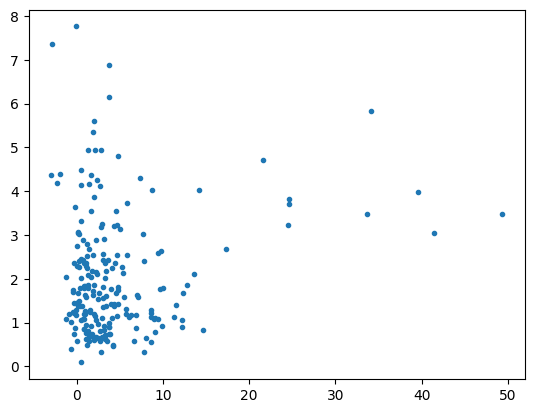

In [147]:
# plot.plot(calval_df['flux_umol_m2_sec'], calval_df['CIRASFLX_L'],'.')
plot.plot(calval_df_3['flux_umol_m2_sec'], calval_df_2['CIRASFLX_L'],'.')
plot.show()

In [152]:
# calval_df_3.timestamp_fluxbot
# calval_df_3.dtypes
calval_df_3.head

<bound method NDFrame.head of     index_ciras PLOT TRTMNT FEAT BOTREP      BOTID CIRASFLX_L CIRASFLX_Q   
0             0    N      O   OM      2    NO OM 2       2.55       2.47  \
0             1    N    MWC   OM      1  NMWC OM 1       3.47       3.07   
0             2    N    MWC   OM      1  NMWC OM 1       4.03       3.62   
0             3    N      O   OM      2    NO OM 2        2.6        2.5   
0             4    N      O   UT      1    NO UT 1       1.81       1.36   
..          ...  ...    ...  ...    ...        ...        ...        ...   
0           207    N      O   OS      2    NO OS 2       2.36       2.35   
0           208    N    MWC   OM      1  NMWC OM 1       5.84       5.69   
0           209    N    MWC   UT      3  NMWC UT 3       1.19       0.73   
0           210    N    MWC   OM      1  NMWC OM 1       3.99       3.76   
0           211    N    MWC   OM      1  NMWC OM 1       3.48       2.91   

          CIRAS_T           timestamp_ciras  ...  flux_mi